Скачивание библиотек

In [ ]:
#!pip install wordcloud

In [ ]:
#!pip install pymorphy2

Подключение библиотек

In [ ]:
from wordcloud import WordCloud
import pymorphy2
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize # токенезация
from nltk.probability import FreqDist #частота встречаемых слов
import matplotlib.pyplot as plt


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Текст оригинала

In [ ]:
text = '''
Я помню чудное мгновенье:
Передо мной явилась ты,
Как мимолетное виденье,
Как гений чистой красоты.
В томленьях грусти безнадежной,
В тревогах шумной суеты,
Звучал мне долго голос нежный
И снились милые черты.
Шли годы. Бурь порыв мятежный
Рассеял прежние мечты,
И я забыл твой голос нежный,
Твои небесные черты.
В глуши, во мраке заточенья
Тянулись тихо дни мои
Без божества, без вдохновенья,
Без слез, без жизни, без любви.
Душе настало пробужденье:
И вот опять явилась ты,
Как мимолетное виденье,
Как гений чистой красоты.
И сердце бьется в упоенье,
И для него воскресли вновь
И божество, и вдохновенье,
И жизнь, и слезы, и любовь.
'''

Считаем все предложения

In [ ]:
sentences = sent_tokenize(text, language = 'russian')

In [ ]:
sentences

['\nЯ помню чудное мгновенье:\nПередо мной явилась ты,\nКак мимолетное виденье,\nКак гений чистой красоты.',
 'В томленьях грусти безнадежной,\nВ тревогах шумной суеты,\nЗвучал мне долго голос нежный\nИ снились милые черты.',
 'Шли годы.',
 'Бурь порыв мятежный\nРассеял прежние мечты,\nИ я забыл твой голос нежный,\nТвои небесные черты.',
 'В глуши, во мраке заточенья\nТянулись тихо дни мои\nБез божества, без вдохновенья,\nБез слез, без жизни, без любви.',
 'Душе настало пробужденье:\nИ вот опять явилась ты,\nКак мимолетное виденье,\nКак гений чистой красоты.',
 'И сердце бьется в упоенье,\nИ для него воскресли вновь\nИ божество, и вдохновенье,\nИ жизнь, и слезы, и любовь.']

In [ ]:
len(sentences)

7

In [ ]:
print(f"{len(sentences)}")

7


Поиск стоп-слов

In [ ]:
stop_words = set(stopwords.words('russian'))
stop_words

{'а',
 'без',
 'более',
 'больше',
 'будет',
 'будто',
 'бы',
 'был',
 'была',
 'были',
 'было',
 'быть',
 'в',
 'вам',
 'вас',
 'вдруг',
 'ведь',
 'во',
 'вот',
 'впрочем',
 'все',
 'всегда',
 'всего',
 'всех',
 'всю',
 'вы',
 'где',
 'да',
 'даже',
 'два',
 'для',
 'до',
 'другой',
 'его',
 'ее',
 'ей',
 'ему',
 'если',
 'есть',
 'еще',
 'ж',
 'же',
 'за',
 'зачем',
 'здесь',
 'и',
 'из',
 'или',
 'им',
 'иногда',
 'их',
 'к',
 'как',
 'какая',
 'какой',
 'когда',
 'конечно',
 'кто',
 'куда',
 'ли',
 'лучше',
 'между',
 'меня',
 'мне',
 'много',
 'может',
 'можно',
 'мой',
 'моя',
 'мы',
 'на',
 'над',
 'надо',
 'наконец',
 'нас',
 'не',
 'него',
 'нее',
 'ней',
 'нельзя',
 'нет',
 'ни',
 'нибудь',
 'никогда',
 'ним',
 'них',
 'ничего',
 'но',
 'ну',
 'о',
 'об',
 'один',
 'он',
 'она',
 'они',
 'опять',
 'от',
 'перед',
 'по',
 'под',
 'после',
 'потом',
 'потому',
 'почти',
 'при',
 'про',
 'раз',
 'разве',
 'с',
 'сам',
 'свою',
 'себе',
 'себя',
 'сейчас',
 'со',
 'совсем',
 'так

Список всех слов в стихотворении

In [ ]:
words = word_tokenize(text)
words

['Я',
 'помню',
 'чудное',
 'мгновенье',
 ':',
 'Передо',
 'мной',
 'явилась',
 'ты',
 ',',
 'Как',
 'мимолетное',
 'виденье',
 ',',
 'Как',
 'гений',
 'чистой',
 'красоты',
 '.',
 'В',
 'томленьях',
 'грусти',
 'безнадежной',
 ',',
 'В',
 'тревогах',
 'шумной',
 'суеты',
 ',',
 'Звучал',
 'мне',
 'долго',
 'голос',
 'нежный',
 'И',
 'снились',
 'милые',
 'черты',
 '.',
 'Шли',
 'годы',
 '.',
 'Бурь',
 'порыв',
 'мятежный',
 'Рассеял',
 'прежние',
 'мечты',
 ',',
 'И',
 'я',
 'забыл',
 'твой',
 'голос',
 'нежный',
 ',',
 'Твои',
 'небесные',
 'черты',
 '.',
 'В',
 'глуши',
 ',',
 'во',
 'мраке',
 'заточенья',
 'Тянулись',
 'тихо',
 'дни',
 'мои',
 'Без',
 'божества',
 ',',
 'без',
 'вдохновенья',
 ',',
 'Без',
 'слез',
 ',',
 'без',
 'жизни',
 ',',
 'без',
 'любви',
 '.',
 'Душе',
 'настало',
 'пробужденье',
 ':',
 'И',
 'вот',
 'опять',
 'явилась',
 'ты',
 ',',
 'Как',
 'мимолетное',
 'виденье',
 ',',
 'Как',
 'гений',
 'чистой',
 'красоты',
 '.',
 'И',
 'сердце',
 'бьется',
 'в',
 'у

In [ ]:
print(len(words))

130


Генерация слов WordCloud

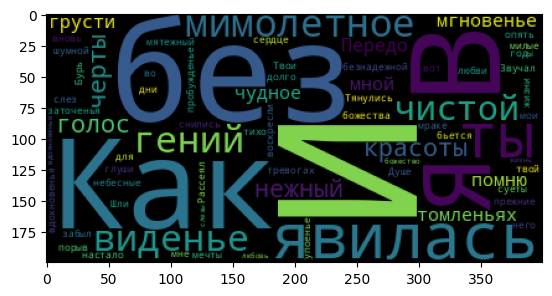

In [ ]:
wc = WordCloud().generate(' '.join([i for i in words]))
plt.imshow(wc)

Приведение слов к нижнему регистру

In [ ]:
words = [word.lower() for word in words if word.isalpha()] # привидение слов к нижнему регистру
words = [word for word in words if word not in stop_words] # исключение стоп-слов
len(words)

70

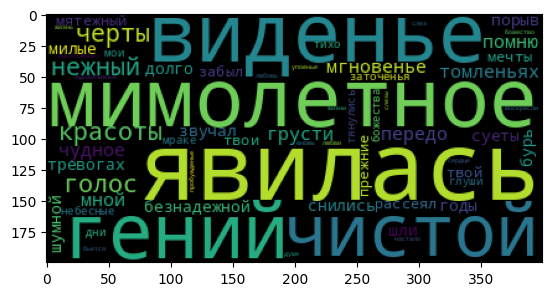

In [ ]:
wc = WordCloud().generate(' '.join([i for i in words]))
plt.imshow(wc)

Лемматизация

In [ ]:
morph = pymorphy2.MorphAnalyzer()

In [ ]:
words = [morph.parse(word)[0].normal_form for word in words]

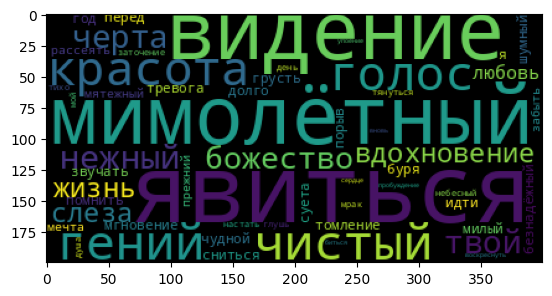

In [ ]:
wc = WordCloud().generate(' '.join([i for i in words]))
plt.imshow(wc)

Частота слов и предложений

In [ ]:
freq_dist = FreqDist(words)
freq_dist

FreqDist({'явиться': 2, 'мимолётный': 2, 'видение': 2, 'гений': 2, 'чистый': 2, 'красота': 2, 'голос': 2, 'нежный': 2, 'черта': 2, 'твой': 2, ...})

In [ ]:
sentence_scores = {}
for i, sentence in enumerate(sentences):
  sentence_words = word_tokenize(sentence.lower())
  sentence_score = sum([freq_dist[word] for word in sentence_words if word in freq_dist])
  sentence_scores[i] = sentence_score


In [ ]:
sentence_scores

{0: 3, 1: 5, 2: 0, 3: 9, 4: 1, 5: 2, 6: 8}

Сортировка предложений по частоте

In [ ]:
sorted_scores = sorted(sentence_scores.items(), key = lambda x: x[1], reverse = True)

In [ ]:
sorted_scores


[(3, 9), (6, 8), (1, 5), (0, 3), (5, 2), (4, 1), (2, 0)]

Суммаризация

In [ ]:
selected_sentences = sorted_scores[:1]
selected_sentences = sorted(selected_sentences)

summary = ' '.join([sentences[i] for i, _ in selected_sentences])
print(summary)

Бурь порыв мятежный
Рассеял прежние мечты,
И я забыл твой голос нежный,
Твои небесные черты.
